In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats



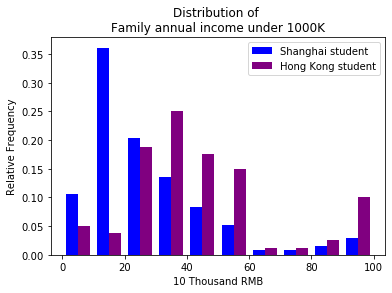

In [3]:
d = pd.read_excel('data_set.xlsx')
###Plot numerical data as histogram
SH = d["INCOME"][0:136]
HK=d["INCOME"][136:234]

legend = ['Shanghai', 'Hong Kong']

dis,sh_dict=Relfreq(SH,10,100,0)
dis,hk_dict=Relfreq(HK,10,100,0)
barwidth=dis/2.6
sh_l=[]
hk_l=[]
for j in sh_dict:
    sh_l.append(j-barwidth/2)
for i in hk_dict:
    hk_l.append(i+barwidth/2)
fig, ax = plt.subplots()
ax.bar(sh_l, sh_dict.values(), width=barwidth, color='blue',label='Shanghai student')
ax.bar(hk_l, hk_dict.values(), width=barwidth, color='purple',label='Hong Kong student')
ax.set_ylabel('Relative Frequency')
ax.set_xlabel('10 Thousand RMB')
ax.set_title("Distribution of \nFamily annual income under 1000K")   
ax.legend(loc='best')


Text(0.5, 1.0, "Participants' Year of Study")

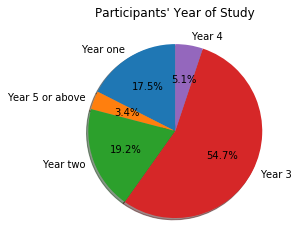

In [4]:
###Plot catagorical data as pie chart
data=d[["Term"]][0:234]
dictionary={"Year one":[1],"Year 5 or above":[5],"Year two":[2],"Year 3":[3],"Year 4":[4]}
label,value=CataFreq(data,dictionary)       
plt.pie(value.values(), labels=label, autopct='%1.1f%%',shadow=True,startangle=90)
plt.title("Participants' Year of Study")


###other possible pie chart data to put in dictionary
# 
# Variable Name:
# 'CityLevel'
# Dictionary:
# "firstclass":[6,7],"newfirstclass":[5],"Abroad":[0],"secondclass":[4],"thirdclass":[3],"unkhown":[8],"forthclass":[2],"fifthclass":[1]

# Variable Name:
# 'HOWDOYOUKNOWUrUni'
# Dictionary:
# "University admission office  \ne.g. official brief session":[1],"Online":[5],"People's \nrecommendation":[2,3],"Other means\n e.g. local education\n bureau's application\n guideline":[4,6]
# 

In [1]:
### Make a relative frequence dictionary from numerical data 
### df: pandas dataframe
### lmax: Set maximum of data
### lmin: Set miminum of data
### num: divide the data into num parts

def Relfreq(df,num,lmax,lmin):
    list = df.values.tolist()
    length=0
    dis=(lmax+lmin)/num
    start=lmin-dis/2
    dict={}
    for i in range(num):
        start+=dis
        dict[start]=0.
        
    for i in df:
        for j in dict:
            if j!=start:
                if i<j+dis/2 and i>=j-dis/2:
                    dict[j]+=1
                    length+=1
            else:
                if i<=j+dis/2 and i>=j-dis/2:
                    dict[j]+=1
                    length+=1
            
    for j in dict:
        dict[j]/=length
    
    return dis,dict
###Condictional Relative Frequency:
def Cond_relfreq(pd,num,lmax,lmin):
    list = pd.values.tolist()
    length=0
    dis=(lmax+lmin)/num
    start=lmin-dis/2
    dict={}
    for i in range(num):
        start+=dis
        dict[start]=0.
        
    for i in list:
        ####here to set the condition:#####
        if i[1]==1 or i[1]==2:
            for j in dict:
                if j!=start:
                    if i[0]<j+dis/2 and i[0]>=j-dis/2:
                        dict[j]+=1
                        length+=1
                else:
                    if i[0]<=j+dis/2 and i[0]>=j-dis/2:
                        dict[j]+=1
                        length+=1
            
    for j in dict:
        dict[j]/=length
    
    return dis,dict

### Calculate catagorical data relative frequence 
### Output: data labels and its corresponding frequence
def CataFreq(df,dict):
    label=[]
    d={}
    
    list = df.values.tolist()
    for i in dict:
        label.append(i)
    for i in dict:
        d[i]=0.
        for k in dict[i]:
            num=0
            for j in list:
                 
                num+=1
                if j[0]==k:
                    d[i]+=1     
                        
    for j in d:
        d[j]/=num
    return label, d
                    
        
def CataFreq2(df):
    label=[]
    dict={}
    for (col,l) in df.iteritems():
        label.append(col)
        dict[col]=0.
        num=0.
        for i in l:
            num+=1
            if i==1:
                dict[col]+=1
            
        dict[col]=dict[col]/num
    return label,dict
